In [1]:
import warnings

from matplotlib import pyplot as plt
import numpy as np

import h5py

$a = y(\gamma_{i} - 1)$ <br>
$b = z(\gamma_{e} - 1)$ <br>
$c = \frac{m_{p}(\gamma_{i} - 1)(\gamma_{e}-1)}{k_{B}(\gamma - 1)}$ <br>
$Te = \frac{m_{p}u(\gamma_{e}-1)(\gamma_{i}-1)}{k\rho (y(\gamma_{i}-1)+Rz(\gamma_{e}-1))}=c\frac{P_{g}}{\rho(a+bR)}$<br>
$C[Pg -> Te] = A = \frac{<Te>}{<Pg>}-\frac{2b<Te><Pg>(R_{h} - <R>)}{(<P_{mag}>^{2}+<Pg>^{2})(a+b<R>)}$ <br>
$C[\rho -> Te] = B = -\frac{<Te>}{<\rho>}$ <br>
$C[B^{2} -> Te] = C = \frac{b<Te><Pg>}{2\mu_{0}(<P_{mag}>^{2}+<Pg>^{2})(a+b<R>)}$ <br>
$cov(X, Y) = <XY> - <X><Y>$ <br>
var(Te) = $(\delta Te)^{2}$ = $A^{2}$var(Pg) + $B^{2}$var($\rho$) + $C^{2}$var(bsq) + 2$AB$cov(Pg, $\rho$) + 2$AC$ cov(Pg, bsq) + 2$BC$ cov($\rho$, bsq)

In [2]:
# some constants
cl = 29979245800.0 # speed of light in cgs
mp = 1.67262171e-24
kb = 1.3806505e-16
mu = 1.

<h3>MAD</h3> <h5>Rh=1</h5>

In [3]:
# the var(Te) expected
varTe_file = np.load('ma_rh1_varTe.npy', allow_pickle=True)

In [4]:
# read in coefficients and other variances to calculate var(Te)
# variances
varPg_file = np.load('ma_varPg.npy', allow_pickle=True)
varRHO_file = np.load('ma_varRHO.npy', allow_pickle=True)
varbsq_file = np.load('ma_varbsq.npy', allow_pickle=True)

# averages
ma_avg_Pg = np.load('ma_avgPg.npy', allow_pickle=True).item()['Pg']
ma_avg_RHO = np.load('ma_avgRHO.npy', allow_pickle=True).item()['RHO']
ma_avg_bsq = np.load('ma_avgbsq.npy', allow_pickle=True).item()['bsq']

ma_avgPgRHO = np.load('ma_avgRHOPg.npy', allow_pickle=True).item()['rhoPg']
ma_avgPgbsq = 2*mu*np.load('ma_avgPgPmag.npy', allow_pickle=True).item()['PgPmag']
ma_avgRHObsq = 2*mu*np.load('ma_avgRHOPmag.npy', allow_pickle=True).item()['rhoPmag']

# covariances
ma_covPgRHO = ma_avgPgRHO - ma_avg_Pg * ma_avg_RHO
ma_covPgbsq = ma_avgPgbsq - ma_avg_Pg * ma_avg_bsq
ma_covRHObsq = ma_avgRHObsq - ma_avg_RHO * ma_avg_bsq

In [5]:
# coefficients
ma_CPg1 = np.load('ma_CPg1.npy')
ma_Crho1 = np.load('ma_Crho1.npy')
ma_Cbsq1 = np.load('ma_Cbsq1.npy')

**log(variance) + log(Te) VS $\theta$**

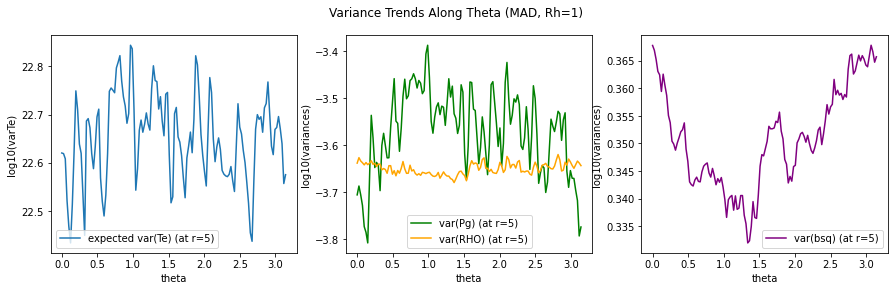

In [6]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi = 0
axes[0].plot(theta, np.log10(varTe_file[r, 0, :]), label='expected var(Te) (at r=%r)'%r)
axes[1].plot(theta, np.log10(varPg_file[r, 0, :]), label='var(Pg) (at r=%r)'%r, color='green')
axes[1].plot(theta, np.log10(varRHO_file[r, 0, :]), label='var(RHO) (at r=%r)'%r, color='orange')
axes[2].plot(theta, np.log10(varbsq_file[r, 0, :]), label='var(bsq) (at r=%r)'%r, color='purple')

axes[0].set_xlabel('theta')
axes[0].set_ylabel('log10(varTe)')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].set_ylabel('log10(variances)')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].set_ylabel('log10(variances)')
axes[2].legend()

fig.suptitle('Variance Trends Along Theta (MAD, Rh=1)')
plt.show()

**log(covariance) + log(Te) VS $\theta$**

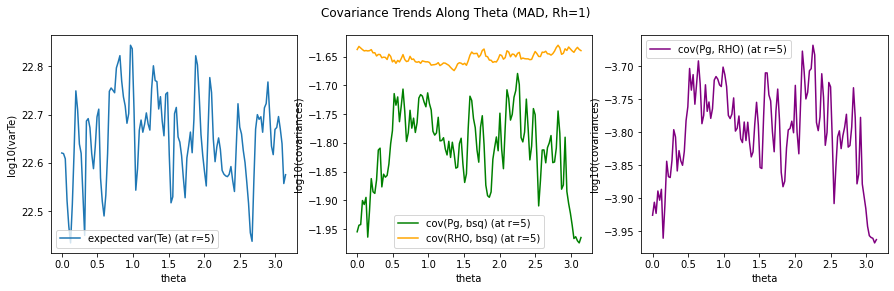

In [7]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi = 0
axes[0].plot(theta, np.log10(varTe_file[r, 0, :]), label='expected var(Te) (at r=%r)'%r)
axes[1].plot(theta, np.log10(ma_covPgbsq[r, 0, :]), label='cov(Pg, bsq) (at r=%r)'%r, color='green')
axes[1].plot(theta, np.log10(ma_covRHObsq[r, 0, :]), label='cov(RHO, bsq) (at r=%r)'%r, color='orange')
axes[2].plot(theta, np.log10(ma_covPgRHO[r, 0, :]), label='cov(Pg, RHO) (at r=%r)'%r, color='purple')

axes[0].set_xlabel('theta')
axes[0].set_ylabel('log10(varTe)')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].set_ylabel('log10(covariances)')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].set_ylabel('log10(covariances)')
axes[2].legend()
fig.suptitle('Covariance Trends Along Theta (MAD, Rh=1)')
plt.show()

**coefficients VS $\theta$**

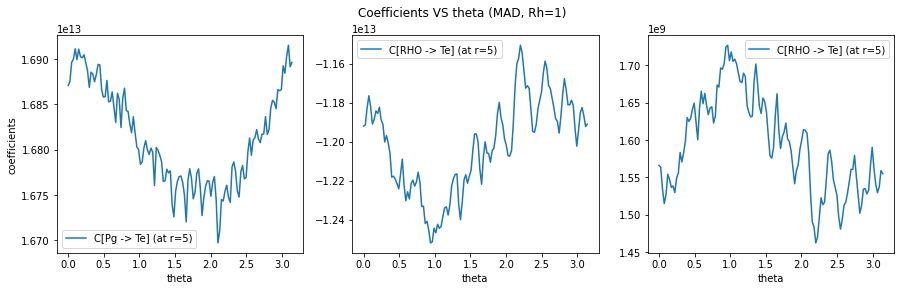

In [8]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)
fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi=0
axes[0].plot(theta, ma_CPg1[r, 0, :], label='C[Pg -> Te] (at r=%r)'%r)
axes[1].plot(theta, ma_Crho1[r, 0, :], label='C[RHO -> Te] (at r=%r)'%r)
axes[2].plot(theta, ma_Cbsq1[r, 0, :], label='C[RHO -> Te] (at r=%r)'%r)

axes[0].set_xlabel('theta')
axes[0].set_ylabel('coefficients')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].legend()
fig.suptitle('Coefficients VS theta (MAD, Rh=1)')
plt.show()

**variances and covariances [Te(calculated) and other quantities] VS $\theta$ with contributions shown**

var(Te) = $(\delta Te)^{2}$ = $A^{2}$var(Pg) + $B^{2}$var($\rho$) + $C^{2}$var(bsq) + 2$AB$cov(Pg, $\rho$) + 2$AC$ cov(Pg, bsq) + 2$BC$ cov($\rho$, bsq)

In [9]:
# var(Te) caculated from coefficients and variances
varPg_term = np.square(ma_CPg1)*varPg_file
varRHO_term = np.square(ma_Crho1)*varRHO_file
varbsq_term = np.square(ma_Cbsq1)*varbsq_file
cov_term1 = 2*ma_CPg1*ma_Crho1*ma_covPgRHO
cov_term2 = 2*ma_CPg1*ma_Cbsq1*ma_covPgbsq
cov_term3 = 2*ma_Crho1*ma_Cbsq1*ma_covRHObsq
varTe_coeff = varPg_term + varRHO_term + varbsq_term + cov_term1 + cov_term2 + cov_term3

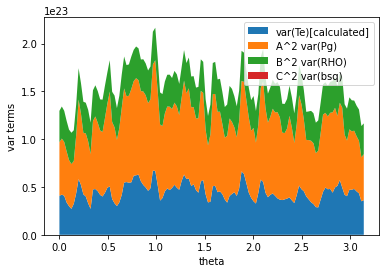

In [10]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)
# cov_term1[r, 0, :], cov_term2[r, 0, :], cov_term3[r, 0, :]
terms = np.vstack([varTe_coeff[r, 0, :], varPg_term[r, 0, :], varRHO_term[r, 0, :], varbsq_term[r, 0, :]])

plt.stackplot(theta, terms, labels=['var(Te)[calculated]', 'A^2 var(Pg)', 'B^2 var(RHO)', 'C^2 var(bsq)'])
plt.xlabel('theta')
plt.ylabel('var terms')
plt.legend()
plt.show()

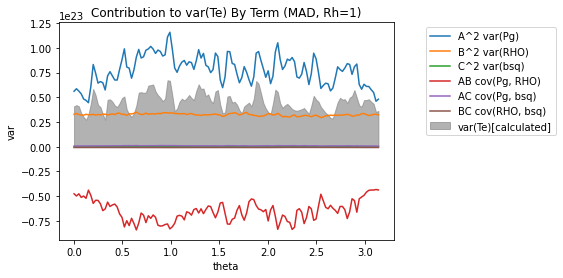

In [11]:
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

plt.plot(theta, varPg_term[r, 0, :], label='A^2 var(Pg)')
plt.plot(theta, varRHO_term[r, 0, :], label='B^2 var(RHO)')
plt.plot(theta, varbsq_term[r, 0, :], label='C^2 var(bsq)')
plt.plot(theta, cov_term1[r, 0, :], label='AB cov(Pg, RHO)')
plt.plot(theta, cov_term2[r, 0, :], label='AC cov(Pg, bsq)')
plt.plot(theta, cov_term3[r, 0, :], label='BC cov(RHO, bsq)')

plt.fill_between(theta, varTe_coeff[r, 0, :], label='var(Te)[calculated]', color='grey', alpha=0.6)

plt.xlabel('theta')
plt.ylabel('var')
plt.title('Contribution to var(Te) By Term (MAD, Rh=1)')
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

bsq terms (variance or covariance) barely have any influence

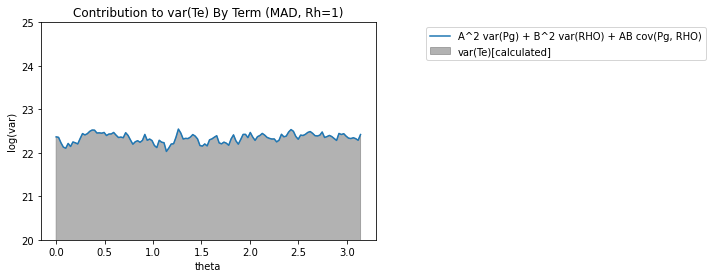

In [38]:
r = 108
# x axis: theta
theta = np.linspace(0, np.pi, 128)

plt.plot(theta, np.log10(varPg_term[r, 0, :] + varRHO_term[r, 0, :] + cov_term1[r, 0, :]), label='A^2 var(Pg) + B^2 var(RHO) + AB cov(Pg, RHO)')

plt.fill_between(theta, np.log10(varTe_coeff[r, 0, :]), label='var(Te)[calculated]', color='grey', alpha=0.6)

plt.xlabel('theta')
plt.ylabel('log(var)')
plt.title('Contribution to var(Te) By Term (MAD, Rh=1)')
plt.ylim(20, 25)
plt.legend(bbox_to_anchor=(2.0, 1.0))
plt.show()

The Pg and $\rho$ terms are the ones that contribute the most to var(Te)

<h5>Rh=160</h5>

In [12]:
# the var(Te) expected
varTe_rh160 = np.load('ma_rh160_varTe.npy', allow_pickle=True)

In [13]:
# coefficients for MAD Rh=160
ma_CPg160 = np.load('ma_CPg160.npy')
ma_Crho160 = np.load('ma_Crho160.npy')
ma_Cbsq160 = np.load('ma_Cbsq160.npy')

**log(variance) + log(Te) VS $\theta$**

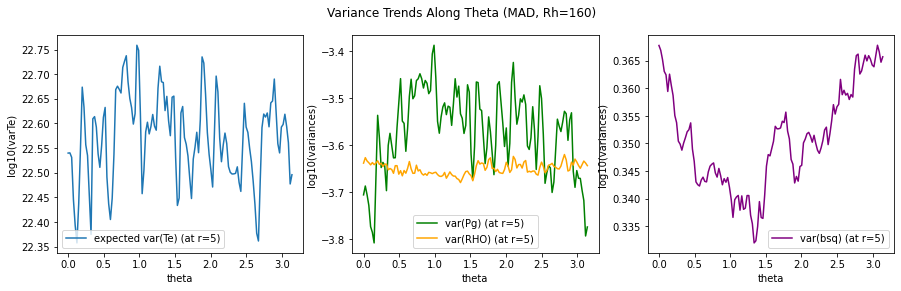

In [14]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi = 0
axes[0].plot(theta, np.log10(varTe_rh160[r, 0, :]), label='expected var(Te) (at r=%r)'%r)
axes[1].plot(theta, np.log10(varPg_file[r, 0, :]), label='var(Pg) (at r=%r)'%r, color='green')
axes[1].plot(theta, np.log10(varRHO_file[r, 0, :]), label='var(RHO) (at r=%r)'%r, color='orange')
axes[2].plot(theta, np.log10(varbsq_file[r, 0, :]), label='var(bsq) (at r=%r)'%r, color='purple')

axes[0].set_xlabel('theta')
axes[0].set_ylabel('log10(varTe)')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].set_ylabel('log10(variances)')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].set_ylabel('log10(variances)')
axes[2].legend()

fig.suptitle('Variance Trends Along Theta (MAD, Rh=160)')
plt.show()

**log(covariance) + log(Te) VS $\theta$**

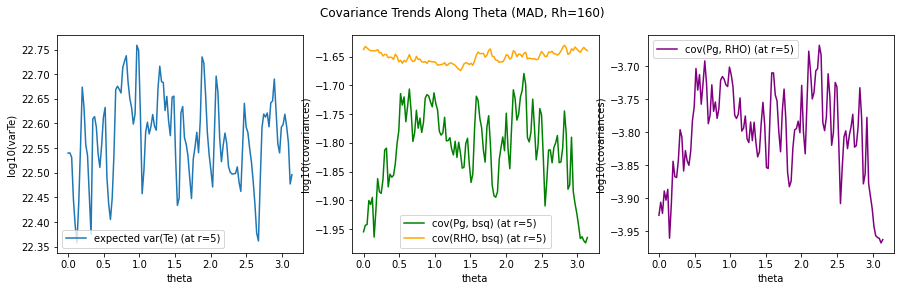

In [15]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi = 0
axes[0].plot(theta, np.log10(varTe_rh160[r, 0, :]), label='expected var(Te) (at r=%r)'%r)
axes[1].plot(theta, np.log10(ma_covPgbsq[r, 0, :]), label='cov(Pg, bsq) (at r=%r)'%r, color='green')
axes[1].plot(theta, np.log10(ma_covRHObsq[r, 0, :]), label='cov(RHO, bsq) (at r=%r)'%r, color='orange')
axes[2].plot(theta, np.log10(ma_covPgRHO[r, 0, :]), label='cov(Pg, RHO) (at r=%r)'%r, color='purple')

axes[0].set_xlabel('theta')
axes[0].set_ylabel('log10(varTe)')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].set_ylabel('log10(covariances)')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].set_ylabel('log10(covariances)')
axes[2].legend()
fig.suptitle('Covariance Trends Along Theta (MAD, Rh=160)')
plt.show()

**coefficients VS $\theta$**

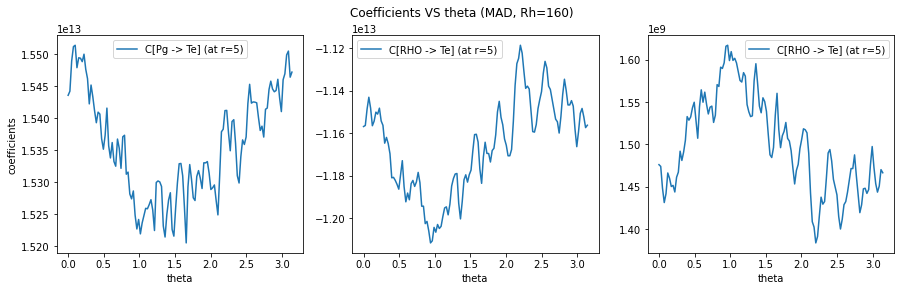

In [16]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)
fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi=0
axes[0].plot(theta, ma_CPg160[r, 0, :], label='C[Pg -> Te] (at r=%r)'%r)
axes[1].plot(theta, ma_Crho160[r, 0, :], label='C[RHO -> Te] (at r=%r)'%r)
axes[2].plot(theta, ma_Cbsq160[r, 0, :], label='C[RHO -> Te] (at r=%r)'%r)

axes[0].set_xlabel('theta')
axes[0].set_ylabel('coefficients')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].legend()
fig.suptitle('Coefficients VS theta (MAD, Rh=160)')
plt.show()

**variances and covariances [Te(calculated) and other quantities] VS $\theta$ with contributions shown**

var(Te) = $(\delta Te)^{2}$ = $A^{2}$var(Pg) + $B^{2}$var($\rho$) + $C^{2}$var(bsq) + 2$AB$cov(Pg, $\rho$) + 2$AC$ cov(Pg, bsq) + 2$BC$ cov($\rho$, bsq)

In [17]:
# var(Te) caculated from coefficients and variances
varPg_term_rh160 = np.square(ma_CPg160)*varPg_file
varRHO_term_rh160 = np.square(ma_Crho160)*varRHO_file
varbsq_term_rh160 = np.square(ma_Cbsq160)*varbsq_file
cov_term1_rh160 = 2*ma_CPg160*ma_Crho160*ma_covPgRHO
cov_term2_rh160 = 2*ma_CPg160*ma_Cbsq160*ma_covPgbsq
cov_term3_rh160 = 2*ma_Crho160*ma_Cbsq160*ma_covRHObsq
varTe_coeff_rh160 = varPg_term_rh160 + varRHO_term_rh160 + varbsq_term_rh160 + cov_term1_rh160 + cov_term2_rh160 + cov_term3_rh160

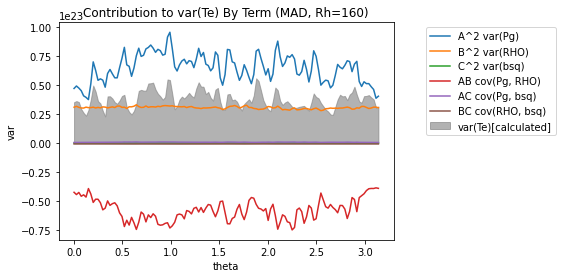

In [18]:
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

plt.plot(theta, varPg_term_rh160[r, 0, :], label='A^2 var(Pg)')
plt.plot(theta, varRHO_term_rh160[r, 0, :], label='B^2 var(RHO)')
plt.plot(theta, varbsq_term_rh160[r, 0, :], label='C^2 var(bsq)')
plt.plot(theta, cov_term1_rh160[r, 0, :], label='AB cov(Pg, RHO)')
plt.plot(theta, cov_term2_rh160[r, 0, :], label='AC cov(Pg, bsq)')
plt.plot(theta, cov_term3_rh160[r, 0, :], label='BC cov(RHO, bsq)')

plt.fill_between(theta, varTe_coeff_rh160[r, 0, :], label='var(Te)[calculated]', color='grey', alpha=0.6)

plt.xlabel('theta')
plt.ylabel('var')
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.title('Contribution to var(Te) By Term (MAD, Rh=160)')
plt.show()

## SANE

<h5>Rh=1</h5>

In [3]:
# the var(Te) directly calculated from the equation
varTe_sa = np.load('sa_rh1_varTe.npy', allow_pickle=True)

In [4]:
# read in coefficients and other variances to calculate var(Te)
# variances
varPg_sa = np.load('sa_varPg.npy', allow_pickle=True)
varRHO_sa = np.load('sa_varRHO.npy', allow_pickle=True)
varbsq_sa = np.load('sa_varbsq.npy', allow_pickle=True)

# averages
sa_avg_Pg = np.load('sa_avgPg.npy', allow_pickle=True).item()['Pg']
sa_avg_RHO = np.load('sa_avgRHO.npy', allow_pickle=True).item()['RHO']
sa_avg_bsq = np.load('sa_avgbsq.npy', allow_pickle=True).item()['bsq']

sa_avgPgRHO = np.load('sa_avgRHOPg.npy', allow_pickle=True).item()['rhoPg']
sa_avgPgbsq = 2*mu*np.load('sa_avgPgPmag.npy', allow_pickle=True).item()['PgPmag']
sa_avgRHObsq = 2*mu*np.load('sa_avgRHOPmag.npy', allow_pickle=True).item()['rhoPmag']

# covariances
sa_covPgRHO = sa_avgPgRHO - sa_avg_Pg * sa_avg_RHO
sa_covPgbsq = sa_avgPgbsq - sa_avg_Pg * sa_avg_bsq
sa_covRHObsq = sa_avgRHObsq - sa_avg_RHO * sa_avg_bsq

In [5]:
# coefficients
sa_CPg1 = np.load('sa_CPg1.npy')
sa_Crho1 = np.load('sa_Crho1.npy')
sa_Cbsq1 = np.load('sa_Cbsq1.npy')

**log(variance) + log(Te) VS $\theta$**

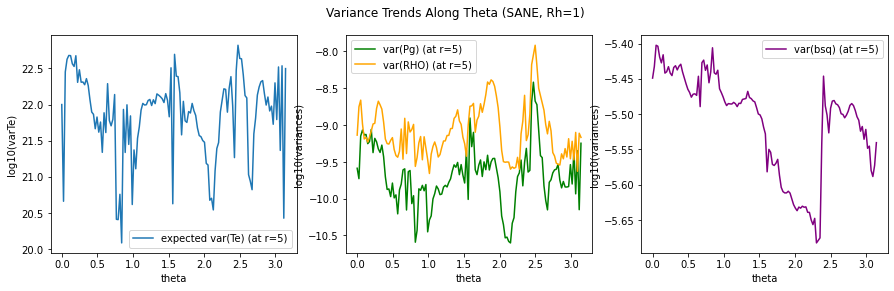

In [6]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi = 0
axes[0].plot(theta, np.log10(varTe_sa[r, 0, :]), label='expected var(Te) (at r=%r)'%r)
axes[1].plot(theta, np.log10(varPg_sa[r, 0, :]), label='var(Pg) (at r=%r)'%r, color='green')
axes[1].plot(theta, np.log10(varRHO_sa[r, 0, :]), label='var(RHO) (at r=%r)'%r, color='orange')
axes[2].plot(theta, np.log10(varbsq_sa[r, 0, :]), label='var(bsq) (at r=%r)'%r, color='purple')

axes[0].set_xlabel('theta')
axes[0].set_ylabel('log10(varTe)')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].set_ylabel('log10(variances)')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].set_ylabel('log10(variances)')
axes[2].legend()

fig.suptitle('Variance Trends Along Theta (SANE, Rh=1)')
plt.show()

**log(covariance) + log(Te) VS $\theta$**

/tmp/ipykernel_82308/1669968732.py:9: RuntimeWarning: invalid value encountered in log10
  axes[1].plot(theta, np.log10(sa_covPgbsq[r, 0, :]), label='cov(Pg, bsq) (at r=%r)'%r, color='green')
/tmp/ipykernel_82308/1669968732.py:10: RuntimeWarning: invalid value encountered in log10
  axes[1].plot(theta, np.log10(sa_covRHObsq[r, 0, :]), label='cov(RHO, bsq) (at r=%r)'%r, color='orange')
/tmp/ipykernel_82308/1669968732.py:11: RuntimeWarning: invalid value encountered in log10
  axes[2].plot(theta, np.log10(sa_covPgRHO[r, 0, :]), label='cov(Pg, RHO) (at r=%r)'%r, color='purple')


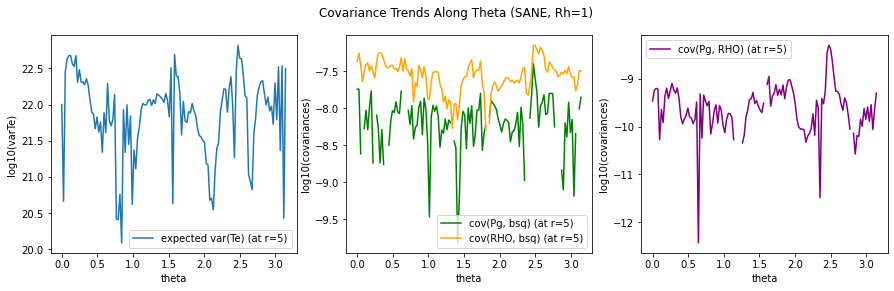

In [7]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi = 0
axes[0].plot(theta, np.log10(varTe_sa[r, 0, :]), label='expected var(Te) (at r=%r)'%r)
axes[1].plot(theta, np.log10(sa_covPgbsq[r, 0, :]), label='cov(Pg, bsq) (at r=%r)'%r, color='green')
axes[1].plot(theta, np.log10(sa_covRHObsq[r, 0, :]), label='cov(RHO, bsq) (at r=%r)'%r, color='orange')
axes[2].plot(theta, np.log10(sa_covPgRHO[r, 0, :]), label='cov(Pg, RHO) (at r=%r)'%r, color='purple')

axes[0].set_xlabel('theta')
axes[0].set_ylabel('log10(varTe)')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].set_ylabel('log10(covariances)')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].set_ylabel('log10(covariances)')
axes[2].legend()
fig.suptitle('Covariance Trends Along Theta (SANE, Rh=1)')
plt.show()

**coefficients VS $\theta$**

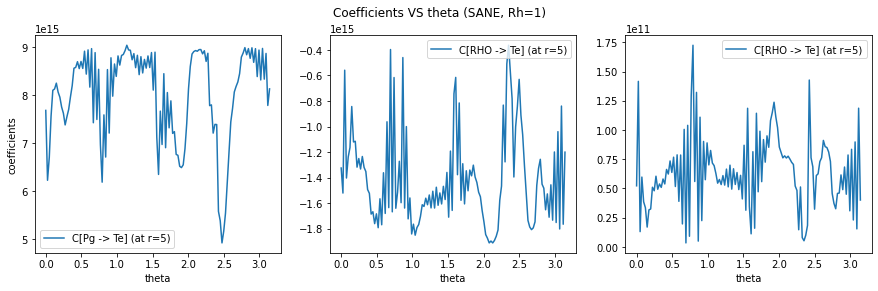

In [8]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)
fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi=0
axes[0].plot(theta, sa_CPg1[r, 0, :], label='C[Pg -> Te] (at r=%r)'%r)
axes[1].plot(theta, sa_Crho1[r, 0, :], label='C[RHO -> Te] (at r=%r)'%r)
axes[2].plot(theta, sa_Cbsq1[r, 0, :], label='C[RHO -> Te] (at r=%r)'%r)

axes[0].set_xlabel('theta')
axes[0].set_ylabel('coefficients')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].legend()
fig.suptitle('Coefficients VS theta (SANE, Rh=1)')
plt.show()

**variances and covariances [Te(calculated) and other quantities] VS $\theta$ with contributions shown**

var(Te) = $(\delta Te)^{2}$ = $A^{2}$var(Pg) + $B^{2}$var($\rho$) + $C^{2}$var(bsq) + 2$AB$cov(Pg, $\rho$) + 2$AC$ cov(Pg, bsq) + 2$BC$ cov($\rho$, bsq)

In [10]:
# var(Te) caculated from coefficients and variances
varPg_term = np.square(sa_CPg1)*varPg_sa
varRHO_term = np.square(sa_Crho1)*varRHO_sa
varbsq_term = np.square(sa_Cbsq1)*varbsq_sa
cov_term1 = 2*sa_CPg1*sa_Crho1*sa_covPgRHO
cov_term2 = 2*sa_CPg1*sa_Cbsq1*sa_covPgbsq
cov_term3 = 2*sa_Crho1*sa_Cbsq1*sa_covRHObsq
varTe_coeff = varPg_term + varRHO_term + varbsq_term + cov_term1 + cov_term2 + cov_term3

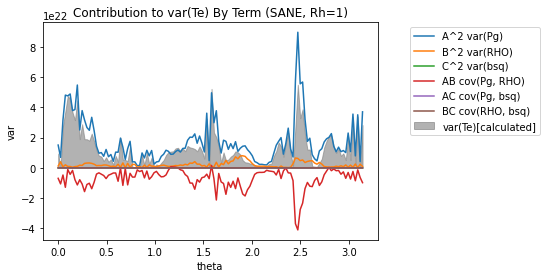

In [19]:
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

plt.plot(theta, varPg_term[r, 0, :], label='A^2 var(Pg)')
plt.plot(theta, varRHO_term[r, 0, :], label='B^2 var(RHO)')
plt.plot(theta, varbsq_term[r, 0, :], label='C^2 var(bsq)')
plt.plot(theta, cov_term1[r, 0, :], label='AB cov(Pg, RHO)')
plt.plot(theta, cov_term2[r, 0, :], label='AC cov(Pg, bsq)')
plt.plot(theta, cov_term3[r, 0, :], label='BC cov(RHO, bsq)')

plt.fill_between(theta, varTe_coeff[r, 0, :], label='var(Te)[calculated]', color='grey', alpha=0.6)

plt.xlabel('theta')
plt.ylabel('var')
plt.title('Contribution to var(Te) By Term (SANE, Rh=1)')
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

<h5>Rh=160</h5>

In [12]:
# the var(Te) expected
varTe_sa_rh160 = np.load('sa_rh160_varTe.npy', allow_pickle=True)

In [13]:
# coefficients
sa_CPg160 = np.load('sa_CPg160.npy')
sa_Crho160 = np.load('sa_Crho160.npy')
sa_Cbsq160 = np.load('sa_Cbsq160.npy')

**log(variance) + log(Te) VS $\theta$**

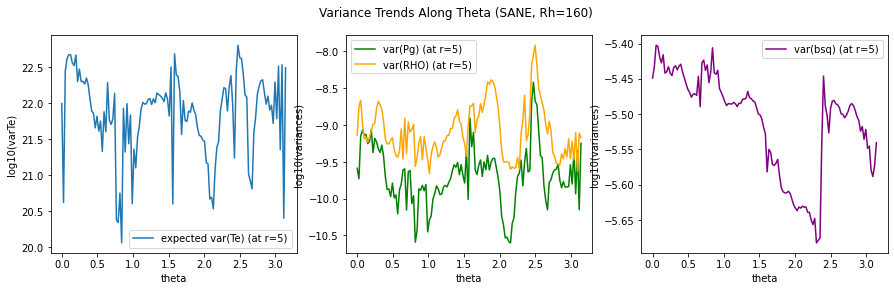

In [14]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi = 0
axes[0].plot(theta, np.log10(varTe_sa_rh160[r, 0, :]), label='expected var(Te) (at r=%r)'%r)
axes[1].plot(theta, np.log10(varPg_sa[r, 0, :]), label='var(Pg) (at r=%r)'%r, color='green')
axes[1].plot(theta, np.log10(varRHO_sa[r, 0, :]), label='var(RHO) (at r=%r)'%r, color='orange')
axes[2].plot(theta, np.log10(varbsq_sa[r, 0, :]), label='var(bsq) (at r=%r)'%r, color='purple')

axes[0].set_xlabel('theta')
axes[0].set_ylabel('log10(varTe)')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].set_ylabel('log10(variances)')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].set_ylabel('log10(variances)')
axes[2].legend()

fig.suptitle('Variance Trends Along Theta (SANE, Rh=160)')
plt.show()

**log(covariance) + log(Te) VS $\theta$**

/tmp/ipykernel_82308/2601351513.py:9: RuntimeWarning: invalid value encountered in log10
  axes[1].plot(theta, np.log10(sa_covPgbsq[r, 0, :]), label='cov(Pg, bsq) (at r=%r)'%r, color='green')
/tmp/ipykernel_82308/2601351513.py:10: RuntimeWarning: invalid value encountered in log10
  axes[1].plot(theta, np.log10(sa_covRHObsq[r, 0, :]), label='cov(RHO, bsq) (at r=%r)'%r, color='orange')
/tmp/ipykernel_82308/2601351513.py:11: RuntimeWarning: invalid value encountered in log10
  axes[2].plot(theta, np.log10(sa_covPgRHO[r, 0, :]), label='cov(Pg, RHO) (at r=%r)'%r, color='purple')


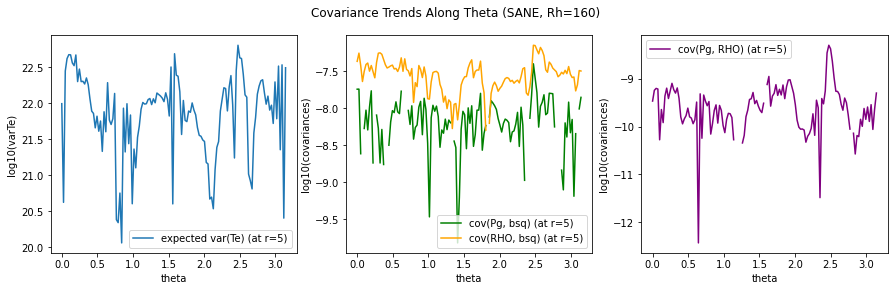

In [15]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi = 0
axes[0].plot(theta, np.log10(varTe_sa_rh160[r, 0, :]), label='expected var(Te) (at r=%r)'%r)
axes[1].plot(theta, np.log10(sa_covPgbsq[r, 0, :]), label='cov(Pg, bsq) (at r=%r)'%r, color='green')
axes[1].plot(theta, np.log10(sa_covRHObsq[r, 0, :]), label='cov(RHO, bsq) (at r=%r)'%r, color='orange')
axes[2].plot(theta, np.log10(sa_covPgRHO[r, 0, :]), label='cov(Pg, RHO) (at r=%r)'%r, color='purple')

axes[0].set_xlabel('theta')
axes[0].set_ylabel('log10(varTe)')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].set_ylabel('log10(covariances)')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].set_ylabel('log10(covariances)')
axes[2].legend()
fig.suptitle('Covariance Trends Along Theta (SANE, Rh=160)')
plt.show()

**coefficients VS $\theta$**

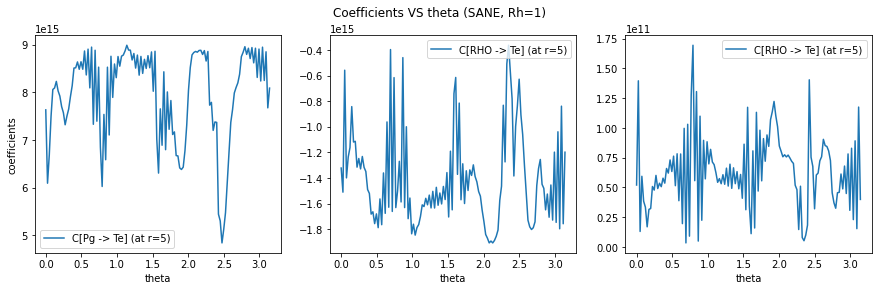

In [16]:
# choose a radius that represents the spherical surface
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)
fig, axes = plt.subplots(1,3, figsize=(15, 4))
# assume phi=0
axes[0].plot(theta, sa_CPg160[r, 0, :], label='C[Pg -> Te] (at r=%r)'%r)
axes[1].plot(theta, sa_Crho160[r, 0, :], label='C[RHO -> Te] (at r=%r)'%r)
axes[2].plot(theta, sa_Cbsq160[r, 0, :], label='C[RHO -> Te] (at r=%r)'%r)

axes[0].set_xlabel('theta')
axes[0].set_ylabel('coefficients')
axes[0].legend()
axes[1].set_xlabel('theta')
axes[1].legend()
axes[2].set_xlabel('theta')
axes[2].legend()
fig.suptitle('Coefficients VS theta (SANE, Rh=1)')
plt.show()

**variances and covariances [Te(calculated) and other quantities] VS $\theta$ with contributions shown**

var(Te) = $(\delta Te)^{2}$ = $A^{2}$var(Pg) + $B^{2}$var($\rho$) + $C^{2}$var(bsq) + 2$AB$cov(Pg, $\rho$) + 2$AC$ cov(Pg, bsq) + 2$BC$ cov($\rho$, bsq)

In [17]:
# var(Te) caculated from coefficients and variances
varPg_term = np.square(sa_CPg160)*varPg_sa
varRHO_term = np.square(sa_Crho160)*varRHO_sa
varbsq_term = np.square(sa_Cbsq160)*varbsq_sa
cov_term1 = 2*sa_CPg160*sa_Crho160*sa_covPgRHO
cov_term2 = 2*sa_CPg160*sa_Cbsq160*sa_covPgbsq
cov_term3 = 2*sa_Crho160*sa_Cbsq160*sa_covRHObsq
varTe_coeff = varPg_term + varRHO_term + varbsq_term + cov_term1 + cov_term2 + cov_term3

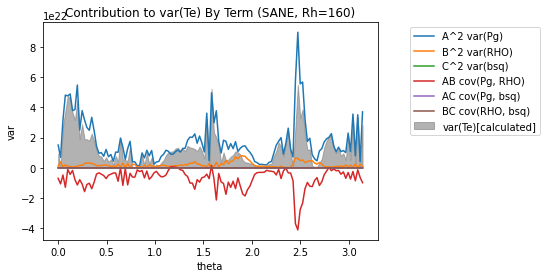

In [20]:
r = 5
# x axis: theta
theta = np.linspace(0, np.pi, 128)

plt.plot(theta, varPg_term[r, 0, :], label='A^2 var(Pg)')
plt.plot(theta, varRHO_term[r, 0, :], label='B^2 var(RHO)')
plt.plot(theta, varbsq_term[r, 0, :], label='C^2 var(bsq)')
plt.plot(theta, cov_term1[r, 0, :], label='AB cov(Pg, RHO)')
plt.plot(theta, cov_term2[r, 0, :], label='AC cov(Pg, bsq)')
plt.plot(theta, cov_term3[r, 0, :], label='BC cov(RHO, bsq)')

plt.fill_between(theta, varTe_coeff[r, 0, :], label='var(Te)[calculated]', color='grey', alpha=0.6)

plt.xlabel('theta')
plt.ylabel('var')
plt.title('Contribution to var(Te) By Term (SANE, Rh=160)')
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()